SUPERVISED LEARNING

Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.


1ST TYPE OF SUPERVISED LEARNING = CLASSIFICATION

There are two major types of supervised machine learning problems, called classification and regression.
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities. Classification is sometimes separated into binary classification, which is the special case of distinguishing between exactly two classes, and multiclass classification, which is classification between more than two classes.

2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

Classification methods
1. K-Nearest Neighbors
2. Logistic Regression and Support Vector Classifier
3. One-vs.-Rest Linear Model
4. Naive Bayes Classifier

Regression methods
1. Linear (OLS) Regression
2. Ridge Regression
3. Lasso

Methods for both Classification and Regression
1. Decision Trees
2. Random Forests
3. Gradient Boosted Regression Trees
4. Kernelized Support Vector Machines
5. Neural Networks 

WHAT PACKAGES DO WE NEED FOR SUPERVISED LEARNING

1. scikit-learn - most prominent Python library for machine learning.
2. numpy - in scikit-learn, the NumPy array is the fundamental data structure. scikit-learn takes in data in the form of NumPy arrays. Any data you’re using will have to be con‐ verted to a NumPy array. 
3. matplotlib - the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots2. 
4. pandas (this can be replaced by polars for more efficient processing) - pandas is a Python library for data wrangling and analysis. It is built around a data structure called the DataFrame that is modeled after the R DataFrame. Simply put, a pandas DataFrame is a table, similar to an Excel spreadsheet. pandas provides a great range of methods to modify and operate on this table; in particular, it allows SQL-like queries and joins of tables. In contrast to NumPy, which requires that all entries in an array be of the same type, pandas allows each column to have a separate type (for example, integers, dates, floating-point numbers, and strings).
5. SciPy - SciPy is a collection of functions for scientific computing in Python. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distri‐ butions. scikit-learn draws from SciPy’s collection of functions for implementing its algorithms. The most important part of SciPy for us is scipy.sparse: this provides sparse matrices, which are another representation that is used for data in scikit- learn. 
6. mglearn - This is a library of utility functions written for the book Introduction to Machine Learning with Python - A Guide for Data Scientists

In [1]:
import sys
#print(sys.path)
#%pip install pandas numpy scikit-learn matplotlib mglearn
#%pip freeze

In [2]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

FEATURES VS. CLASSES AND THE PROBLEM OF UNBALANCED CLASSES

Autotracer sales has 5 percent conversion rate. So if the yes-no purchase was the dependent variable, there would be an inbalance in class representation - it might require random sampling of the no class to create a suitable balanced dataset. 

In [3]:
print ("Keys of iris_dataset: \n{} \n".format(iris_dataset.keys()))
print ("The CLASSES of Iris flowers are\n{} \n".format(iris_dataset['target_names'] )) 
print ("The FEATURES that might have predictive power for classes are \n {} \n".format(iris_dataset['feature_names'] ))
#print ("A more thorough description of the dataset can be found here  \n{}".format(iris_dataset['DESCR']) )


Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

The CLASSES of Iris flowers are
['setosa' 'versicolor' 'virginica'] 

The FEATURES that might have predictive power for classes are 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 



In [4]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


TRAIN-TEST SPLIT

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. 

It doesn't matter if the random_state is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. Random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [5]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
#grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
#                            hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

1. K-NEAREST NEIGHBORS

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.” It then assigns the data point the same CLASS as the class of the nearest neighbor. 

In [6]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


As for the test data point, we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

In [7]:
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises.

ONLY 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. 

ONE NEIGHBOR

In [8]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)

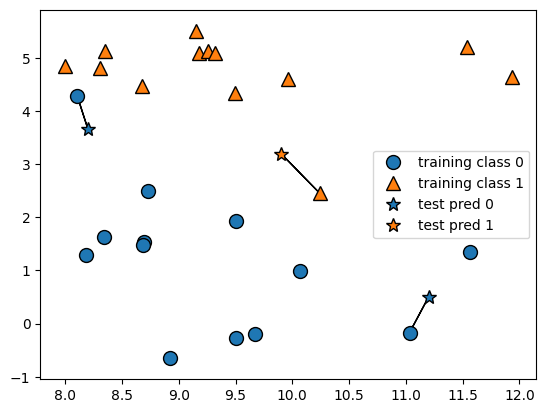

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

MULTIPLE NEIGHBORS

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent.

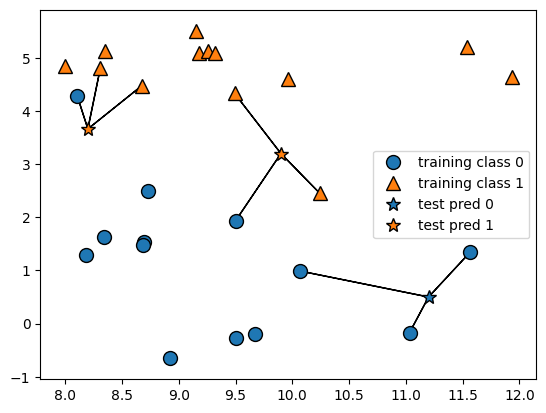

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [11]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

CONCLUSION: 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and using many neighbors corresponds to low model complexity 

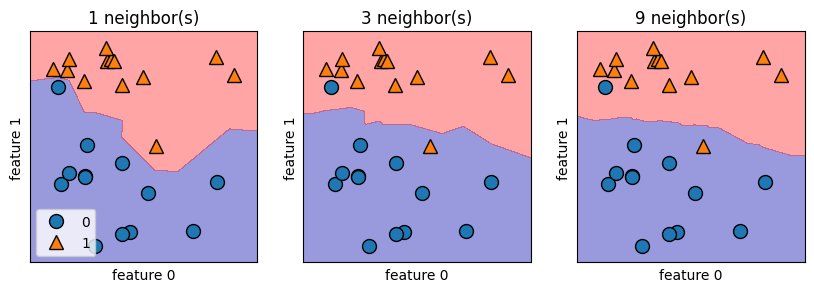

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

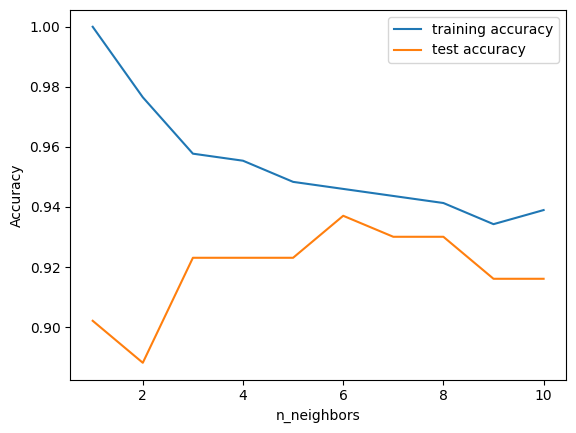

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neigh‐ bors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

K-NEAREST NEIGHBORS EVALUATION

Using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.


STRENGHTS
1. comprehension - the model is very easy to understand
2. reasonable performance without many adjustments, good baseline model
3. speed - fast with small datasets

WEAKNESSES
1. when the training set is very large (either in number of features or in number of samples) prediction can be slow.
2. when using the k-NN algorithm, it’s important to preprocess your data 
3. does not perform well on datasets with many features (hundreds or more)
4. it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

2. LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINES

Logistic regression is one of the two most common linear classification algorithms - together with Support Vector Machines. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


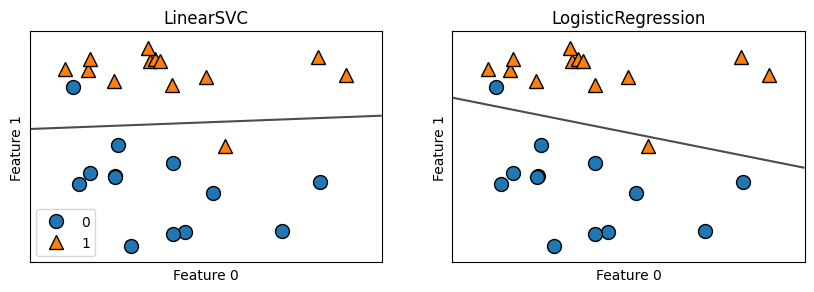

In [14]:

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()


SUPPORT VECTOR MACHINES VS. LOGISTIC REGRESSION

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the y-axis, as before. We display the decision boundaries found by LinearSVC and LogisticRegression respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom. In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0. The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

REGULARIZATION PARAMETER C

THE HIGHER THE C, THE MORE COMPLEX THE MODEL.

When you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero. There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Here is an illustration using LinearSVC


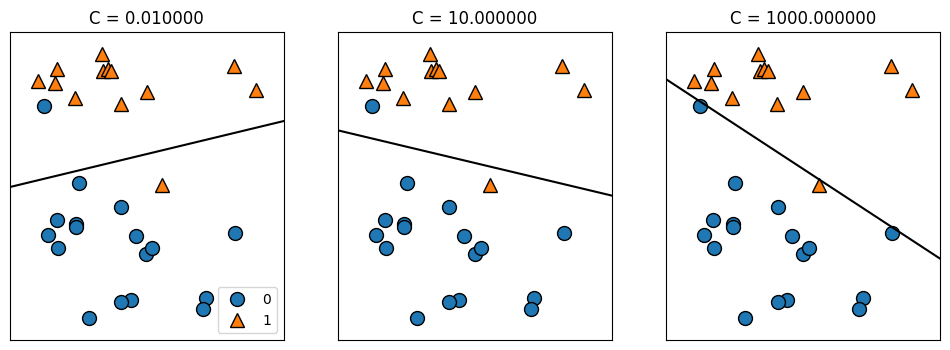

In [15]:
mglearn.plots.plot_linear_svc_regularization()

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

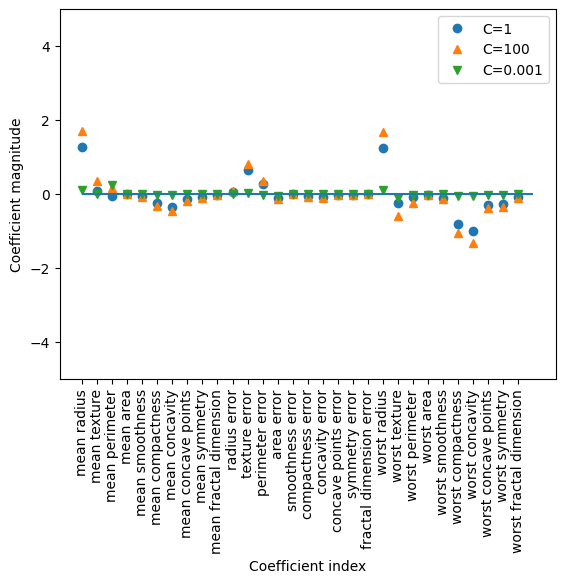

In [16]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

3. LINEAR MODEL FOR MULTICLASS CLASSIFICATION = ONE-VS.-REST

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

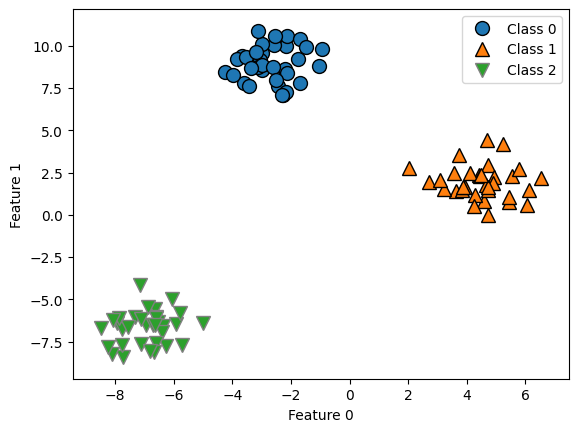

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

We train a LinearSVC classifier on the dataset. We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

All the points belonging to class 0 in the training data are above the line corresponding to class. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” 

And what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the class of the closest line.


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

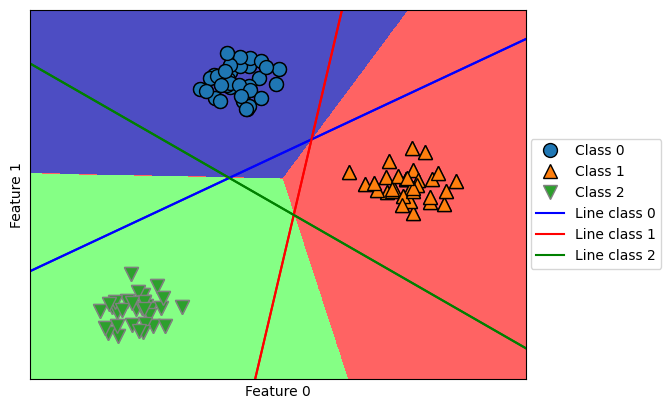

In [18]:
linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                      ['b', 'r', 'g']):
        plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
        plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

LINEAR MODELS EVALUATION

STRENGTHS
1. speed = very fast to train, and also fast to predict
2. scalability = scale to very large datasets and work well with sparse data

If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.

3. interpretability = they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification 

WEAKNESSES
1. poor interpretability if there is multicollinearity = 

4. NAIVE BAYES CLASSIFIERS

Naive Bayes classifiers are quite similar to the linear models but they are faster to train. But they are more difficult to generalise. There are 3 main types of these classifiers:

A. GaussianNB is used for any continuous data,  
B. BernoulliNB is used for binary data (counts how often every feature of each class is not zero), mostly used in text data classification.
C. MultinomialNB assumes count data (each feature represents an integer count of something, like how often a word appears in a sentence), again mostly used in text data classification. 

In [19]:
X = np.array([[0, 1, 0, 1],
                  [1, 0, 1, 1],
                  [0, 0, 0, 1],
                  [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature 
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


ALPHA PARAMETER

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics.

THE HIGHER THE ALPHA, THE MORE COMPLEX THE MODEL. 

STRENGTHS 
1. very fast to train and to predict,  
2. the training procedure is easy to understand. 
3. work very well with high-dimensional sparse data 
4. are relatively robust to the parameters.  
5. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.

2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

1. STANDARD OLS LINEAR REGRESSION

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

w[0]: 0.393906  b: -0.031804


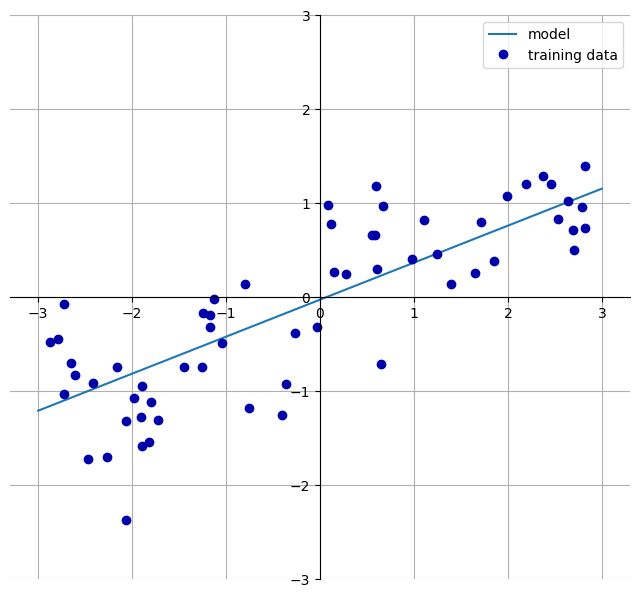

In [20]:
mglearn.plots.plot_linear_regression_wave()

In [21]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [22]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [23]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


With higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. In line with this, when comparing training set and test set scores in our large Boston dataset, we find that we predict very accurately on the training set, but the R2 on the test set is much worse.

2. RIDGE REGRESSION

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called REGUARIZATION. Regularization means explicitly RESTRICTING a model TO AVOID OVERFITTING. The particular kind used by ridge regression is known as L2 regularization.

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


PARAMETER ALPHA

ALPHA HAS THE OPPOSITE MEANING THAN C. THE HIGHER THE ALPHA, THE SIMPLER THE MODEL. 

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. 

DECREASING ALPHA MAKES THE COEFFICIENTS LESS RESTRICTED, UNTIL WE END UP WITH VALUES EQUIVALENT OF LINEAR REGRESSION

Training set score: 0.93
Test set score: 0.77


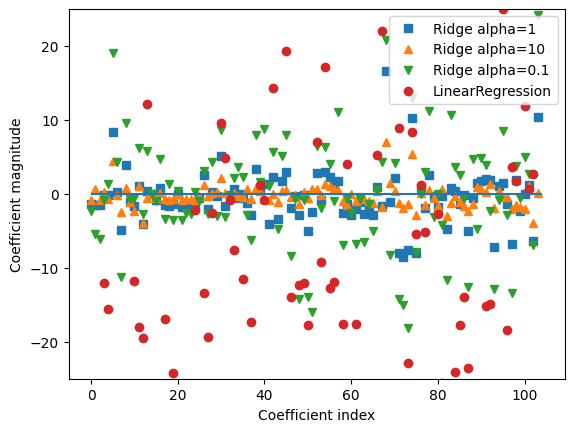

In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

3. LASSO

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [28]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


ALPHA, AGAIN ...

A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand.
If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to Linear Regression.

Text(0, 0.5, 'Coefficient magnitude')

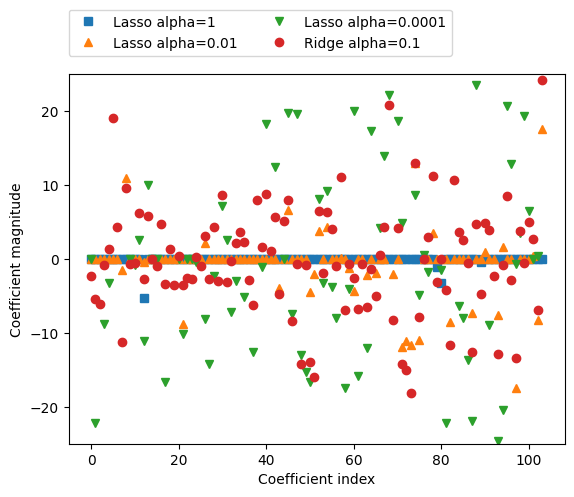

In [29]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

RIDGE VS. LASSO

Ridge regression is usually the first choice between these two models. 

However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. 

scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

LINEAR MODELS OVERVIEW

REGULARIZATION PARAMETER - large values for alpha or small values for C mean simple models

REGULARIZATION TYPE - If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

STRENGTHS
1. very fast to train, and also fast to predict, they scale to very large datasets and work well with sparse data
2. relatively easy to understand how a prediction is made

WEAKNESSES
1. it is often not entirely clear why coefficients are the way they are, particularly if the dataset has highly correlated features
2.  in lower-dimensional spaces, other models might yield better generalization performance. They only work well when the number of features is large compared to the number of samples.

MIXED CLASSIFICATION AND REGRESSION TECHNIQUES

1. DECISION TREES

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

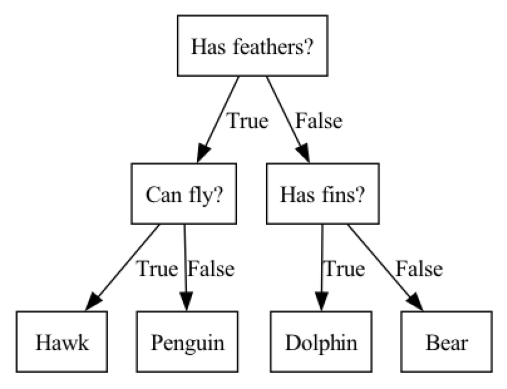

In [30]:
import sys
sys.path
#!conda install -c conda-forge graphviz python-graphviz -y
mglearn.plots.plot_animal_tree()

In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn them from data using supervised learning.


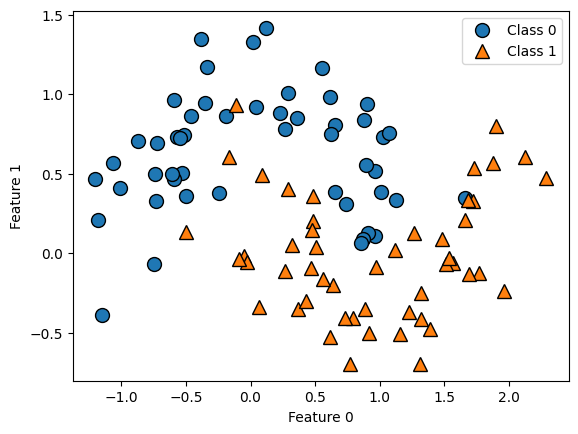

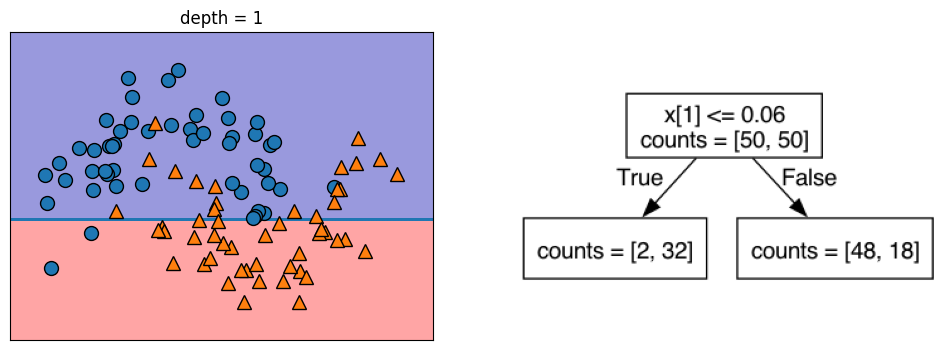

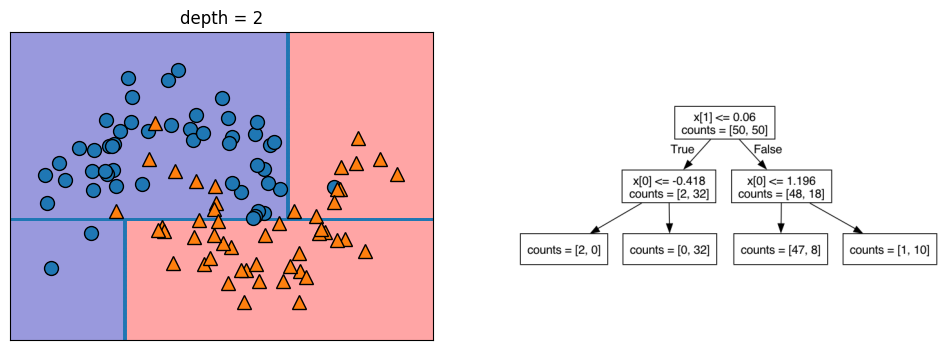

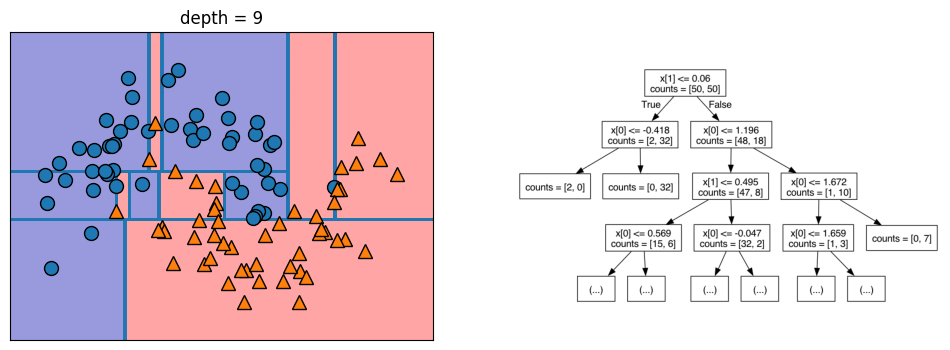

In [31]:
mglearn.plots.plot_tree_progressive()

TESTS

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests. To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The first test that is picked. Splitting the dataset vertically at x[1]=0.0596 yields the most information; it best separates the points in class 1 from the points in class 2. 

We only specify the depth of the decision tree (the number of tests). The algorithm then searches what are - for the given number of tests - the most informative tests about the target variable to ask. 

ROOT 

The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1.

This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. This yields a view of the algorithm as building a hierarchical partition. As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.

PURE TREE

A leaf of the tree that contains data points that all share the same target value is called pure - i.e., perfectly fits the training dataset

PRUNING (PRE- AND POST-)

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not post-pruning.

In [32]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [33]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


PREPRUNNING

As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

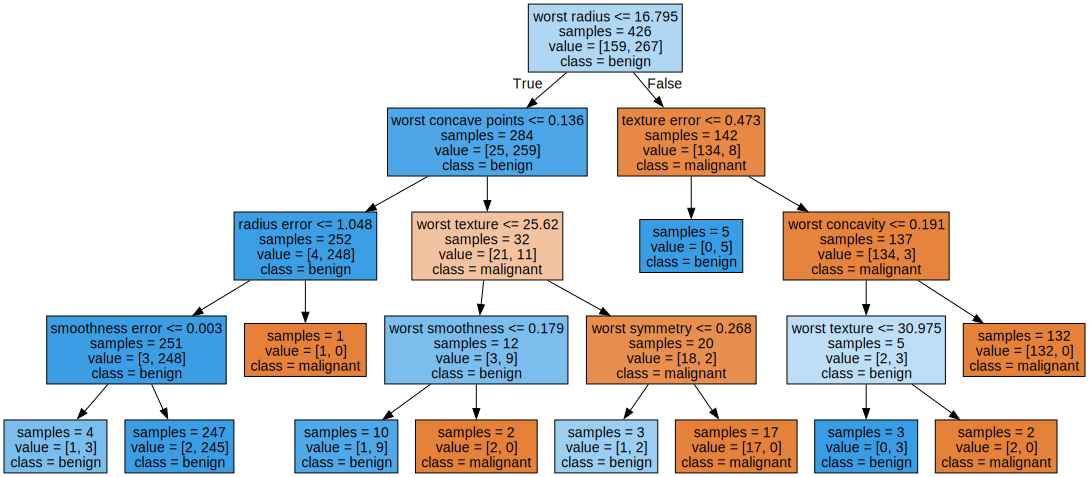

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)


tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

FEATURE IMPORTANCE

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [35]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


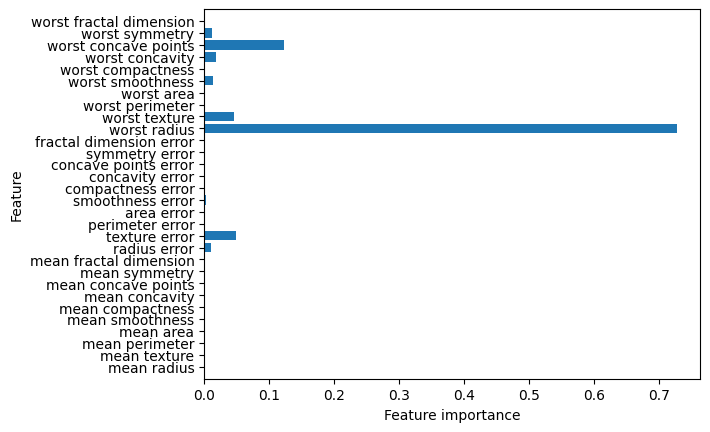

In [36]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

FEATURES AND CLASSES

We see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well. However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

UNLIKE LINEAR COEFFICIENTS, FEATURE IMPORTANCES ARE ALWAYS POSITIVE AND THEY DON'T ENCODE WHICH CLASS A FEATURE IS INDICATIVE OF. 

Feature importances: [0. 1.]


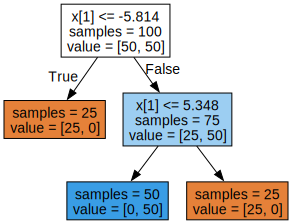

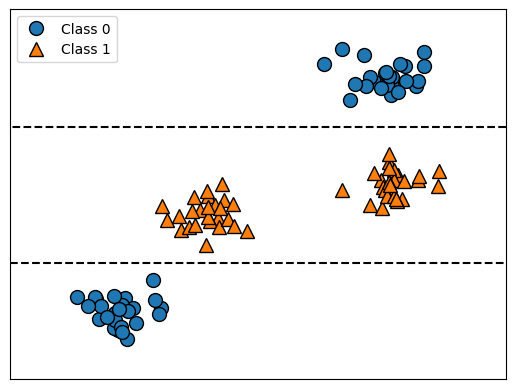

In [37]:

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

NON MONOTONOUS RELATIONSHIP

In the example above, we cant say a high value of X[0] means class 0, and a low value means class 1 - the same applies to regression. 

DECISION TREE REGRESSOR

This function can be used for regression tree. Beware that the DecisionTreeRegressor and all other tree-based regression models are not able to extrapolate - make predictions outside of the range of the training data. 

Text(0, 0.5, 'Price in $/Mbyte')

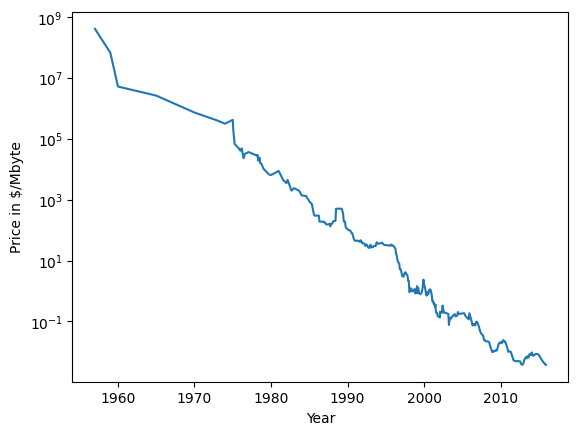

In [38]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

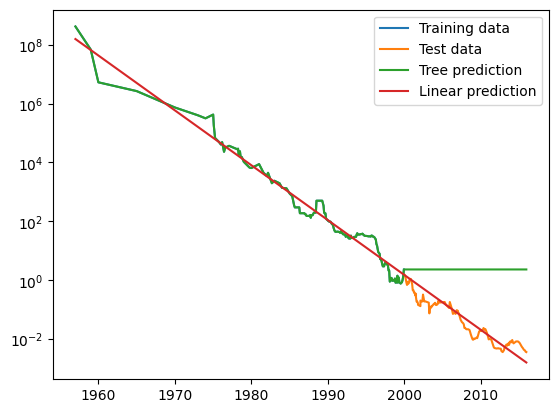

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# use historical data to forecast prices after the year 2000 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy().reshape(-1, 1)
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy().reshape(-1, 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

LINEAR MODEL VS. DECISION TREE

The linear model approximates the data with a line, as we knew it would. This line provides quite a GOOD FORECAST FOR THE TEST DATA (the years after 2000), while glossing over some of the finer variations in both the training and the test data. The TREE MODEL, on the other hand, MAKES PERFECT PREDICTIONS ON TRAINING DATA = OVERFITS; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point.


DECISION TREES CONCLUSION

STRENGHTS
1. the restuling model can be easily visualised and understood
2. the algorithms are completely invariant to scaling of the data (no standardization or normalization is necessary)
3. they work well when features are on completely different scales, or a mix of binary and continuous features

WEAKNESSES
1. they tend to overfit even with pre-pruning -> in most cases, an ensamble method is preferred to a single tree

2. RANDOM FORESTS

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. 

Parameters of random forests
1. n_estimators = number of trees. LARGER IS ALWAYS BETTER. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.”These trees will be built completely independently of each other, and the algorithm will make different random choices for each tree to make sure each tree is unique.
2. n_samples = from our original sample we shuffle the data points so that even the amount of data points remains the same but some data points are removed and others are represented multiple times in the set. 
3. max_features = the number of features to test, a high number of features means that the trees in the random forest will be quite similar to each other and they will be able to fit the data easily, using the most distinctive feature. Conversely, low max_features means that the trees in the random forest will be quite different and that each tree might need to be very deep to fit the data well. It’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_fea tures=log2(n_features) for regression. Adding max_features or max_leaf_nodes might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.
4. max_depth = for pre-prunning

In [40]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                        random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

estimator attribute = the trees that are build as part of the random forest are stored here. 

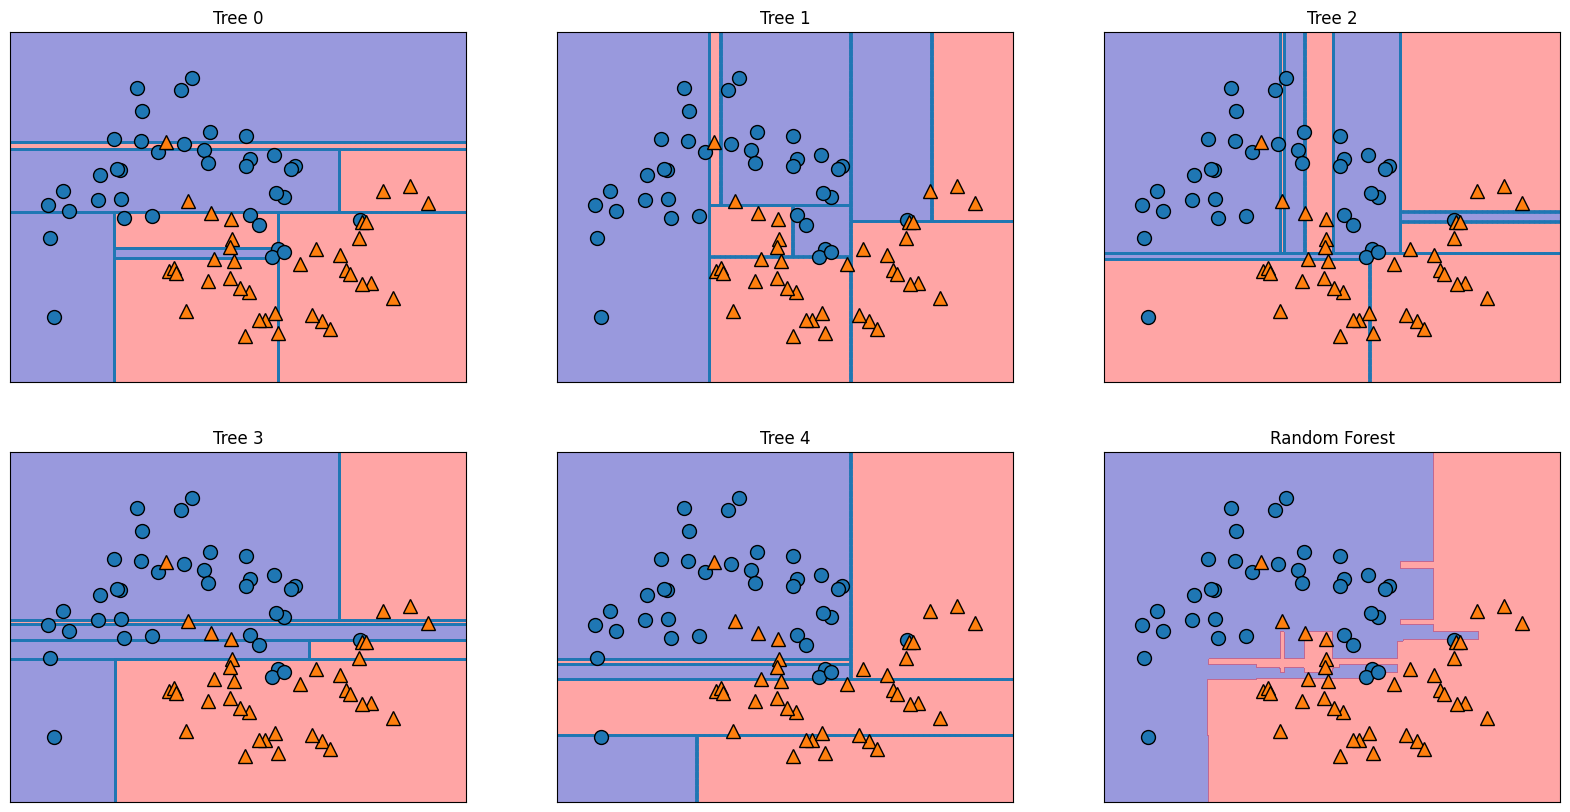

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
        ax.set_title("Tree {}".format(i))
        mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


FEATURE SELECTION

As you can see, the random forest gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall. The randomness in building the ran‐ dom forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.


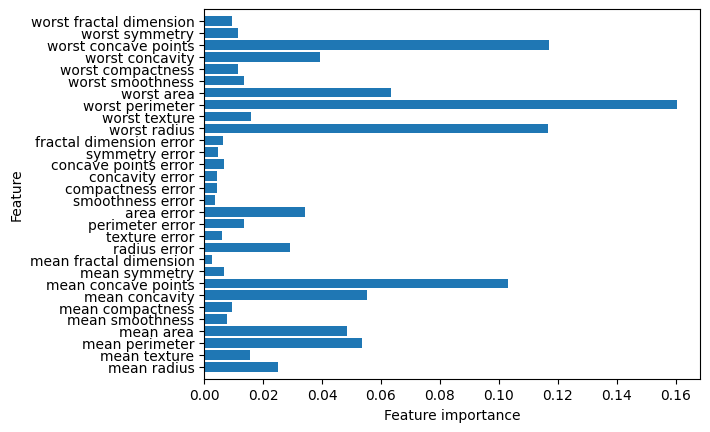

In [43]:
plot_feature_importances_cancer(forest)

RANDOM TREES EVALUATION

STRENGHTS
1. Among the most widely used machine learning methods = ndom forests share all of the benefits of decision trees, while making up for some of their deficiencies
2. very powerful
3. work well without heavy tuning of the parameters
4. don’t require scaling of the data

WEAKNESSES
1. not as interpretable as decision trees = It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets). Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice.
2. Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate. 
3. andom forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a linear model instead.



3. GRADIENT BOOSTED REGRESSION TREES

The gradient boosted regression tree is another ensemble method that combines mul‐ tiple decision trees to create a more powerful model. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees.

PARAMETERS

learning_rate = controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models.

n_estimators = adds more trees to the ensemble, hence also increasing the model complexity, as the model has more chances to correct mistakes on the training set. In contrast to random forests, where a higher n_esti mators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over dif‐ ferent learning_rates.

max_depth = to reduce the complexity of each tree. Usually max_depth is set very low for gradient boosted models, often not deeper than five splits.




DECISION TREES VS. GRADIENT BOOSTED REGRESSION TREES

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier 
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the accuracy on training set is 100 percent, we are probably overfitting - so lets reduce the maximum depth or lower the learning rate (to reduce overfitting).

In [45]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [46]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, lowering the maximum depth of the trees provided a significant improvement of the model, while lowering the learning rate only increased the generalization performance slightly.

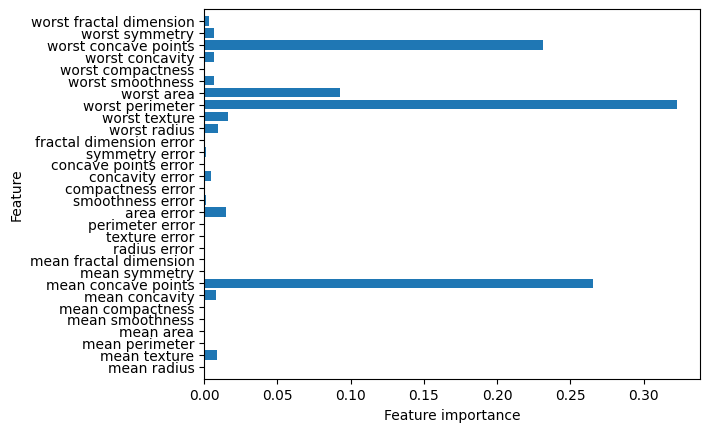

In [47]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

GRADIENT BOOSTED REGRESSION TREES EVALUATION

STRENGTHS
1. Gradient boosted decision trees are among the most powerful and widely used models for supervised learning
2. The algorithm works well without scaling and on a mixture of binary and continuous features

WEAKNESSES
1. require careful tuning of the parameters  
2. may take a long time to train
3. as with other tree-based models, it also often does not work well on high-dimensional sparse data.

4. KERNELIZED SUPPORT VECTOR MACHINES

Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. There are support vector machines for both classification and for regression.

One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.

Text(0, 0.5, 'Feature 1')

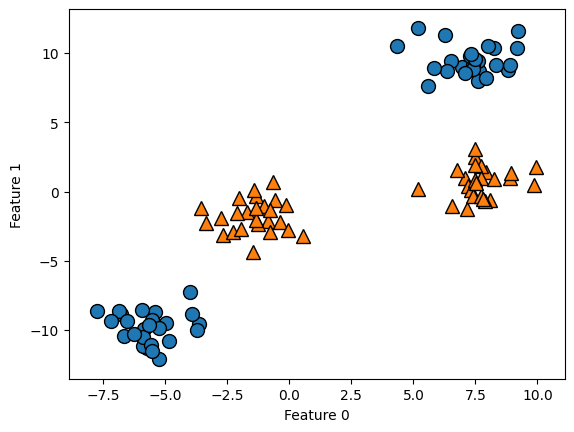

In [48]:
X, y = make_blobs(centers=4, random_state=8) 
y=y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

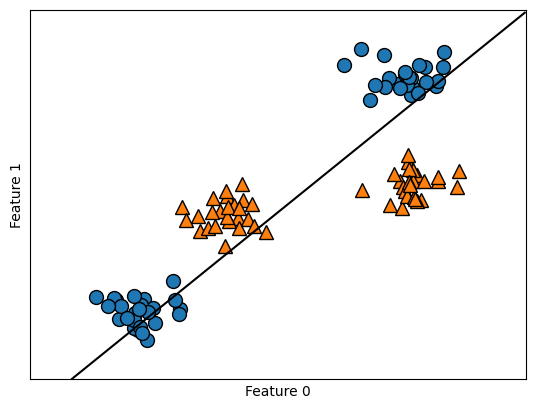

In [49]:
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset. Now let’s expand the set of input features, say by also adding feature1 ** 2, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, (feature0, feature1, feature1 ** 2).

In [62]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


NameError: name 'Axes3D' is not defined

<Figure size 640x480 with 0 Axes>

NO LONGER LINEAR

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse, as you can see from the plot created above.

THE KERNEL TRICK

The lesson here is that adding nonlinear features to the representation of our data can make linear models much more powerful. However, often we don’t know which features to add, and adding many features might make computation very expensive. Luckily, there is a clever mathematical trick = compute distance of data points for the expanded feature representation.

There are 2 ways to do this
1. polynomial kernel - computes all possible polynomials up to a certain degree
2. radial basis function kernel/Gaussian kernel = it considers all possible polynomials of all degrees but the importance of features reduces for higher degrees.

SUPPORT VECTORS

Training points that lie on the border between two classes, These so-called support vectors are the only relevant data points for the decision boundary. 


Text(0, 0.5, 'Feature 1')

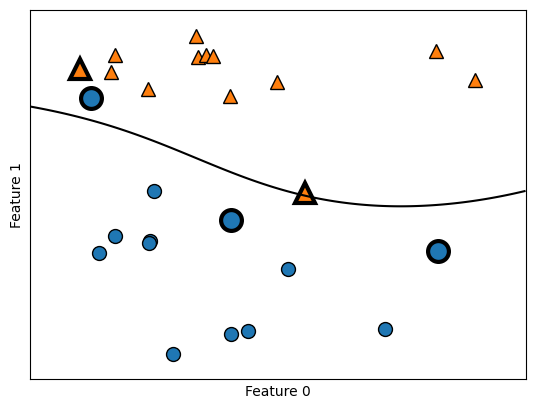

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

PARAMETERS

In this case, the SVM yields a very smooth and nonlinear (not a straight line) boundary. We adjusted two parameters here: the C parameter and the gamma parameter. 

FOR BOTH PARAMETERS, THE HIGHER THE VALUES THE MORE COMPLEX THE MODEL

By default, C=1 and gamma=1/n_features.

C PARAMETER
- controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together.
- higher C means more elaborate (curvy) model
- higher C means fewer data points matter (are considered relevant) for the fitline

GAMMA PARAMETER
- is a regularization parameter, similar to that used in the linear models. It limits the importance of each point (or more precisely, their dual_coef_).
- high Gama means high potential for overfitting

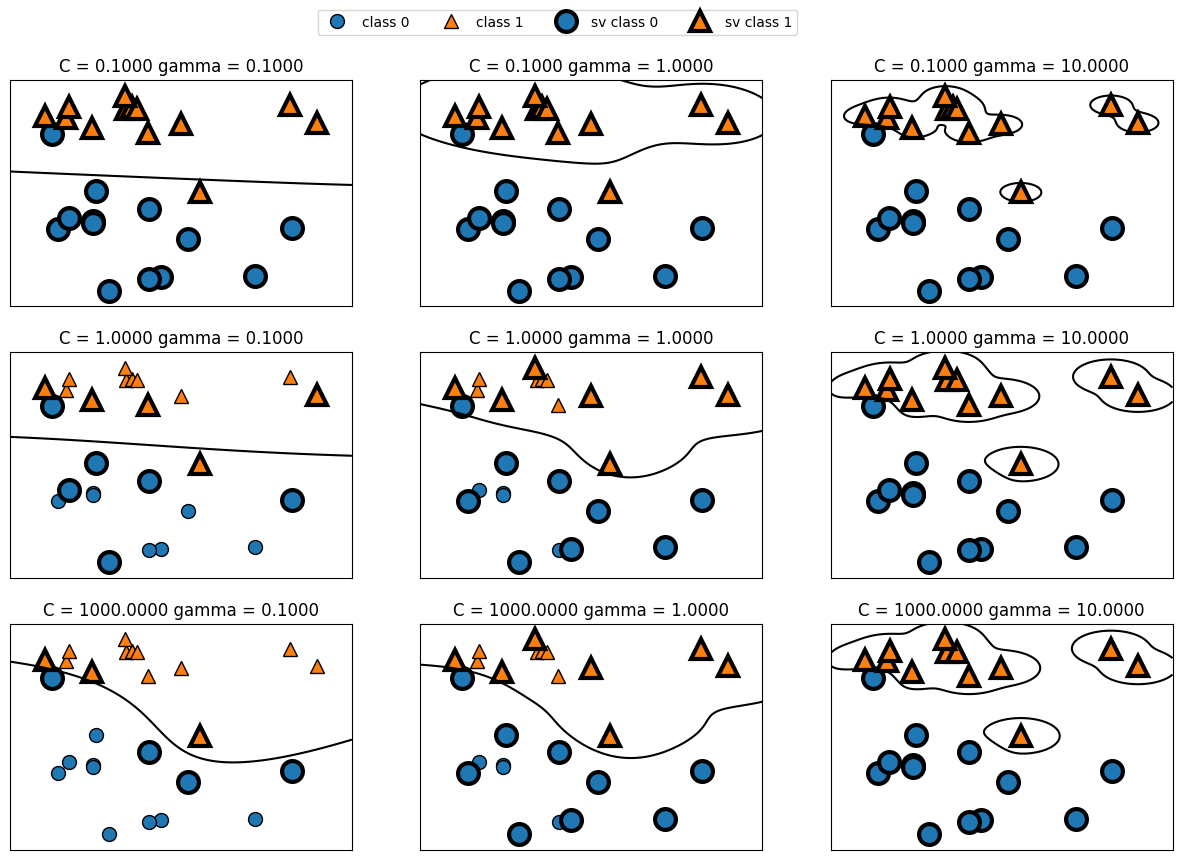

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


DATA SCALING

In the "default" model above, the SVM seem to be overfitting the data. Careful with setting parameters and scaling! KSVM require all features to vary on a similar scale. The features in the figure below are on a log scale - in other words, different features have different orders of magnitude

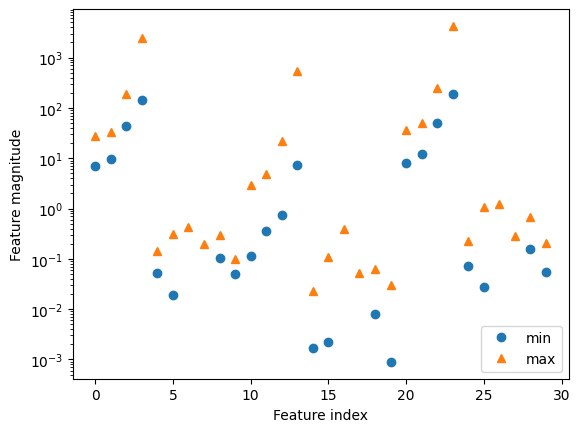

In [51]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

RESCALING
One way to resolve this problem is by rescaling each feature so that they are all approximately on the same scale. A common rescaling method for kernel SVMs is to scale the data such that all features are between 0 and 1. 

In [52]:

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training 
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0))) 
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [53]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details) 
X_test_scaled = (X_test - min_on_training) / range_on_training

KERNELIZED SUPPORT VECTOR MACHINES EVALUATION

STRENGTHS
1. SVMs allow for complex decision boundaries, even if the data has only a few features. 
2. They work well on low-dimensional and high-dimensional data (i.e., few and many features)

WEAKNESSES
1. they don’t scale very well with the number of samples. Run‐ ning an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.
2. they require careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no pre‐ processing) in many applications. 
3. they are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.


NEURAL NETWORKS

Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision. Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which is a weighted sum of the inputs.

WEIGHTS

In an MLP this process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result. Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick.

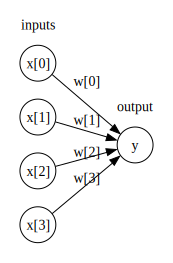

In [63]:
display(mglearn.plots.plot_logistic_regression_graph())

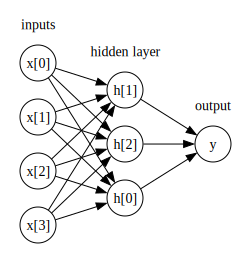

In [64]:
display(mglearn.plots.plot_single_hidden_layer_graph())

ACTIVATION FUNCTIONS

After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result—usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of this function is then used in the weighted sum that computes the output, ŷ. 

The relu cuts off values below zero, while tanh saturates to –1 for low input values and +1 for high input values. Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could.

Text(0, 0.5, 'relu(x), tanh(x)')

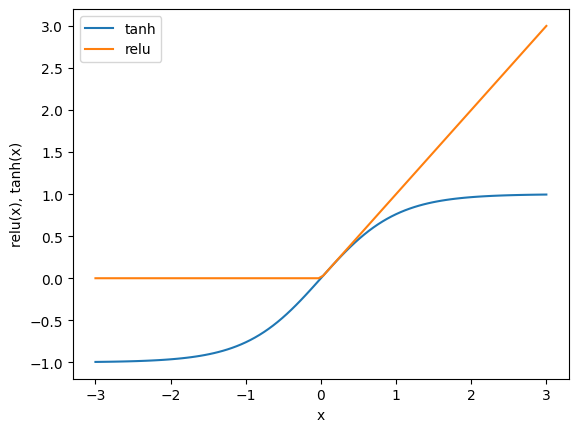

In [65]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

NUMBER OF NODES IN HIDDEN LAYER

An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets and as big as 10,000 for very complex data.

NUMBER OF HIDDEN LAYERS

It is also possible to add additional hidden layers. Having large neural networks made up of many of these layers of computation is what inspired the term “deep learning.”

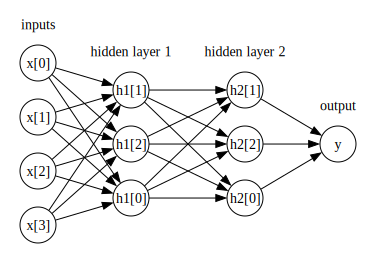

In [66]:
mglearn.plots.plot_two_hidden_layer_graph()

Decision boundary learned by a neural network with 10 hidden units on the two_moons dataset

Text(0, 0.5, 'Feature 1')

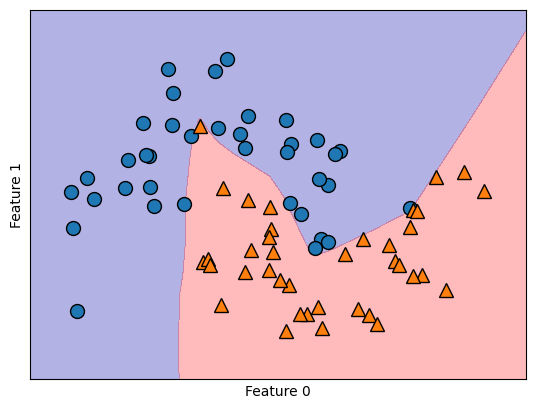

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As you can see, the neural network learned a very nonlinear but relatively smooth decision boundary. We used algorithm='l-bfgs', which we will discuss later. By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number (which reduces the complexity of the model) and still get a good result.

Text(0, 0.5, 'Feature 1')

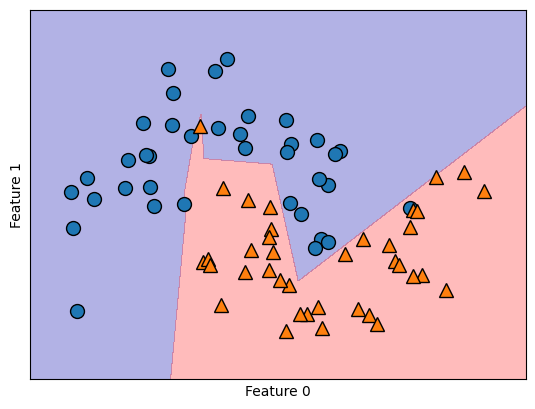

In [71]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

ADDING SECOND HIDDEN LAYER WITH 10 NODES EACH AND RELU ACTIVATION FUNCTION

Text(0, 0.5, 'Feature 1')

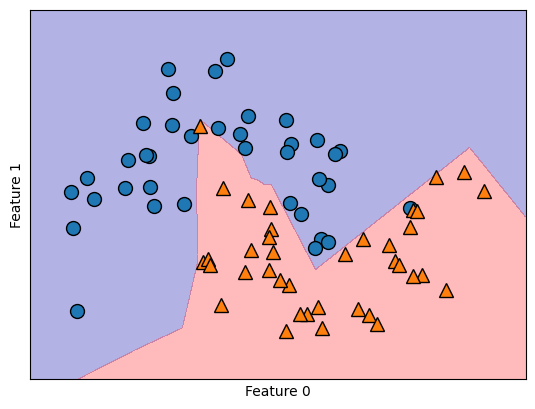

In [73]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,  activation='relu',
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

ADDING SECOND HIDDEN LAYER WITH 10 NODES EACH AND TANH ACTIVATION FUNCTION

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

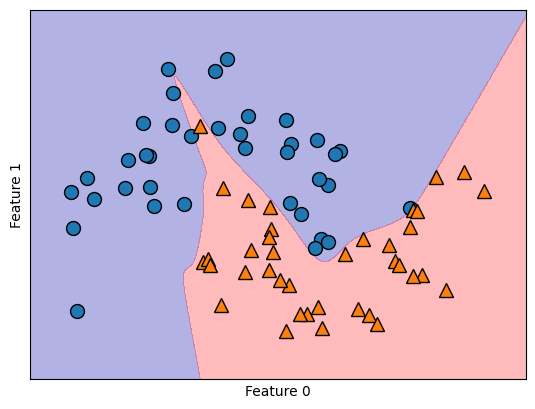

In [74]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,  activation='tanh',
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


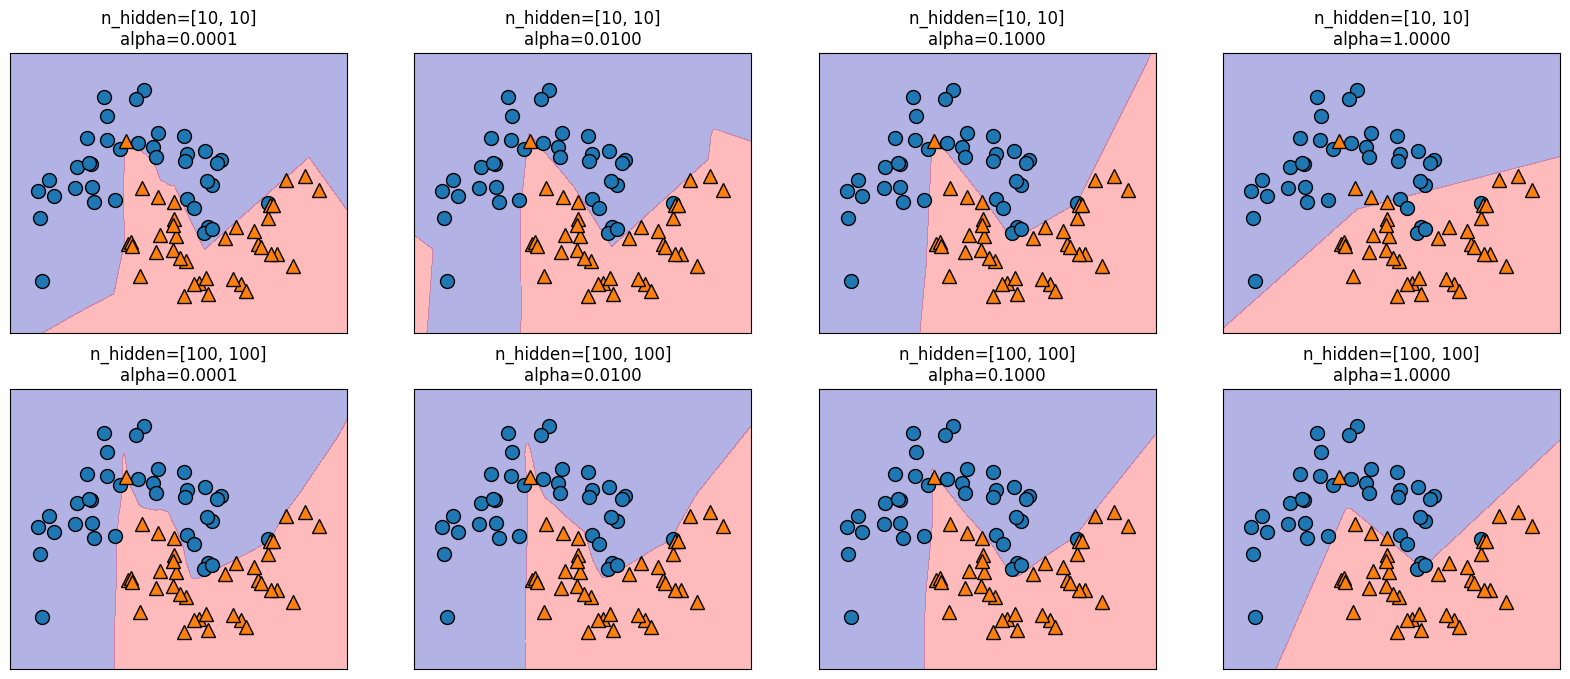

In [76]:

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

PARAMETERS OF NEURAL NETWORKS
1. the number of hidden layers
2. the number of units in each hidden layer
3. regularization parameter alpha
4. activation function

RANDOMNESS

An important property of neural networks is that their weights are set randomly before learning is started, and this random initialization affects the model that is learned. That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds.

In [81]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)

In [83]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


SCALING, AGAIN

The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [84]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set 
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.378


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.371


NUMBER OF ITERATIONS

We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm for learning the model, and tells us that we should increase the number of iterations. Increasing the number of iterations only increased the training set performance, not the generalization performance. Still, the model is performing quite well. As there is some gap between the training and the test performance, we might try to decrease the model’s complexity to get better generalization performance. Here, we choose to increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger regularization of the weights.

In [86]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.371


INTERPRETING THE NEURAL NETWORK LEARNING

While it is possible to analyze what a neural network has learned, this is usually much trickier than analyzing a linear model or a tree-based model. One way to introspect what was learned is to look at the weights in the model. You can see an example of this in the scikit-learn example gallery. For the Breast Cancer dataset, this might be a bit hard to understand. The following plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative value

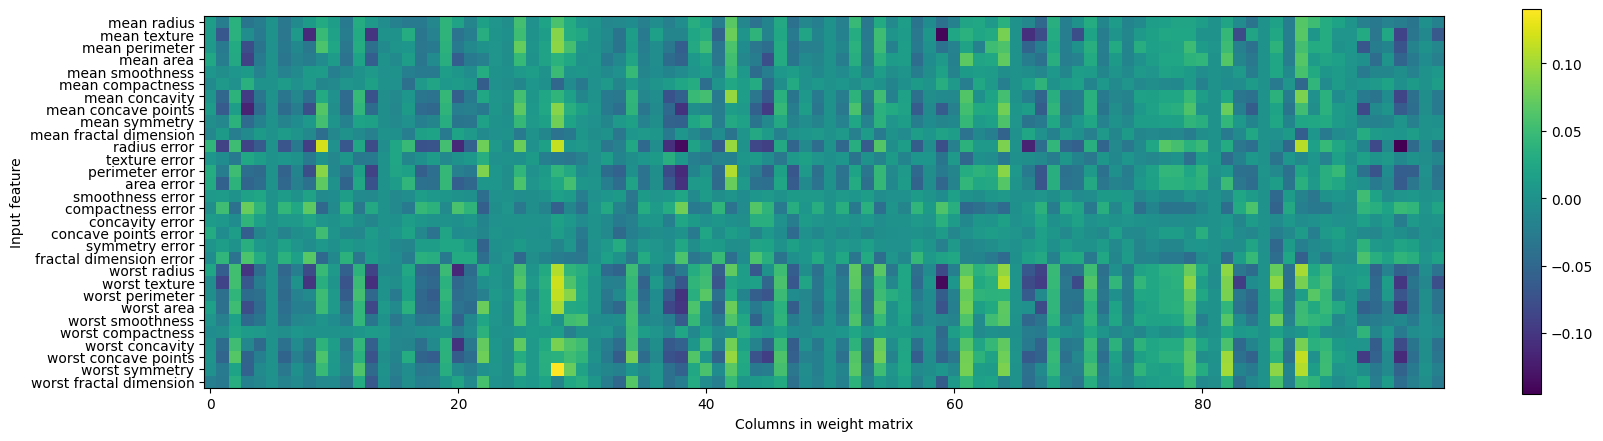

In [87]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.

MORE ADVANCED NEURAL NETWORK LIBRARIES

1. keras 
2. lasagna
3. tensor-flow

These libraries provide a much more flexible interface to build neural networks and track the rapid progress in deep learning research. All of the popular deep learning libraries also allow the use of high-performance graphics processing units (GPUs), which scikit-learn does not support. Using GPUs allows us to accelerate computations by factors of 10x to 100x, and they are essential for applying deep learning methods to large-scale datasets.

NEURAL NETWORK EVALUATION

STRENGHTS
1. they are able to capture infor‐ mation contained in large amounts of data and build incredibly complex models
2. given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

WEAKNESSES
1. neural networks—particularly the large and powerful ones—often take a long time to train. 
2. They also require careful preprocessing of the data, as we saw here. Similarly to SVMs, they work best with “homogeneous” data, where all the features have similar meanings. For data that has very different kinds of features, tree-based models might work better. Tuning neural network parameters is also an art unto itself.
